In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [3]:
url = 'https://raw.githubusercontent.com/RamiKrispin/coronavirus/master/csv/coronavirus.csv'

df = pd.read_csv(url, header = 0,
                usecols = ['date', 'province', 'country', 'type', 'cases']) 

In [4]:
df_us = df[(df['country']=='US') & (df['type']=='recovered') & (df['date']>='2020-10-26') & (df['date']<='2020-11-09')]


In [5]:
df_us

,date,province,country,type,cases
211742,2020-10-26,NaN,US,recovered,37577
211743,2020-10-27,NaN,US,recovered,27211
211744,2020-10-28,NaN,US,recovered,30474
211745,2020-10-29,NaN,US,recovered,36196
211746,2020-10-30,NaN,US,recovered,24116
211747,2020-10-31,NaN,US,recovered,34026
211748,2020-11-01,NaN,US,recovered,18101
211749,2020-11-02,NaN,US,recovered,44402
211750,2020-11-03,NaN,US,recovered,30149
211751,2020-11-04,NaN,US,recovered,38397


[Text(0, 0.5, 'Recovered Cases'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'Daily recovered cases in the United States from October to November')]

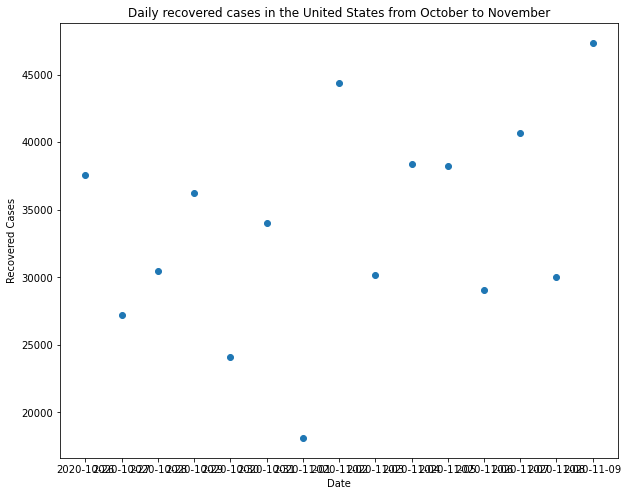

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))                           
ax.scatter(df_us.date, df_us.cases) 
ax.set(xlabel='Date', ylabel='Recovered Cases', title = 'Daily recovered cases in the United States from October to November')


In [8]:
df_brazil = df[(df['country']=='Brazil') & (df['type']=='confirmed') & (df['date']>='2020-02-01') & (df['date']<='2020-11-01')]
df_brazil['mov_avg'] = df_brazil.cases.rolling(7).mean()
df_brazil.head(20)

<ipython-input-8-bc2a8fecaebe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brazil['mov_avg'] = df_brazil.cases.rolling(7).mean()


,date,province,country,type,cases,mov_avg
6544,2020-02-01,NaN,Brazil,confirmed,0,NaN
6545,2020-02-02,NaN,Brazil,confirmed,0,NaN
6546,2020-02-03,NaN,Brazil,confirmed,0,NaN
6547,2020-02-04,NaN,Brazil,confirmed,0,NaN
6548,2020-02-05,NaN,Brazil,confirmed,0,NaN
6549,2020-02-06,NaN,Brazil,confirmed,0,NaN
6550,2020-02-07,NaN,Brazil,confirmed,0,0.0
6551,2020-02-08,NaN,Brazil,confirmed,0,0.0
6552,2020-02-09,NaN,Brazil,confirmed,0,0.0
6553,2020-02-10,NaN,Brazil,confirmed,0,0.0


<ipython-input-10-2546fb0cb943>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brazil['mov_avg7'] = df_brazil.cases.rolling(7).mean()
<ipython-input-10-2546fb0cb943>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brazil['mov_avg30'] = df_brazil.cases.rolling(30).mean()


[Text(0, 0.5, '# of confirmed cases'),
 Text(0.5, 1.0, 'The Number of Covid-19 Confirmed Cases in Brazil from Febuary to November 2020')]

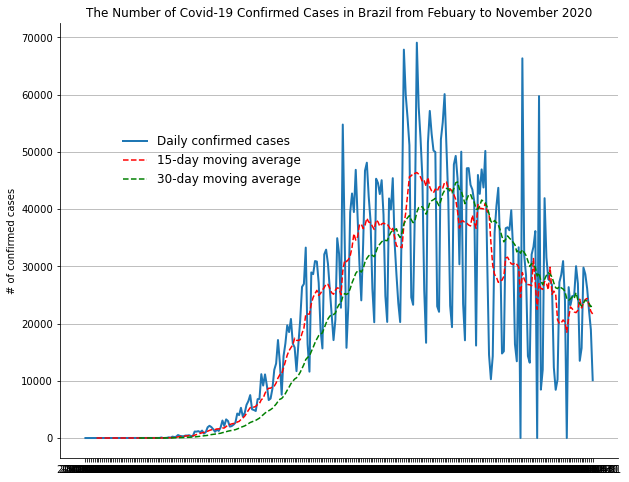

In [10]:
df_brazil['mov_avg7'] = df_brazil.cases.rolling(7).mean()
df_brazil['mov_avg30'] = df_brazil.cases.rolling(30).mean()

fig, ax = plt.subplots(figsize=(10,8))

ax.plot(df_brazil.date, df_brazil.cases, linewidth=2,
        label='Daily confirmed cases')                                         

ax.plot(df_brazil.date, df_brazil.mov_avg7,                                            
        'r--',                                                                 
        label='15-day moving average') 
ax.plot(df_brazil.date, df_brazil.mov_avg30,
       'g--',                                                                 
        label='30-day moving average'
       )


ax.spines['top'].set_visible(False)                                            
ax.spines['right'].set_visible(False)                                          

ax.grid(axis='y')                                                              
ax.set_axisbelow(True)                                                        

ax.legend(frameon=False, fontsize=12, bbox_to_anchor=(0.45, 0.6))           
ax.set(ylabel='# of confirmed cases', title = 'The Number of Covid-19 Confirmed Cases in Brazil from Febuary to November 2020')